<a id='top'></a>
# 1. GRADIENT DESCENT

**Table of Contents**

<br> 1.1 [Gradient Descent Demistified](#GradientDescent)
<br> 1.2 [Gradient Descent in Machine Learning](#GDImportance)
<br> 1.3 [Initializing the session and setting directories](#StartingSession)
<br> 1.4 [The Six-Hump Camel Function](#TheSixHumpCamelFunction)
<br> 1.5 [Initializing the Gradient Descent Exercise](#InitializeGD)
<br> 1.6 [Plain Vanilla Gradient Descent](#PlainVanillaGD)
<br> 1.7 [Momentum Gradient Descent](#MomentumGD)
<br> 1.8 [Nestrov's Accelerated Gradient Descent](#NestAccGD)
<br> 1.9 [Conclusion](#conclusion)

<a id='GradientDescent'></a>
## 1.1 Gradient Descent Demistified

 - In this section we will discuss Plain Vanilla Gradient Descent and two of its variants:
     - Momentum Gradient Descent
     - Nestrov's Accelerated Gradient Descent

<a id='fig'></a> 
<br> [Go to Plain Vanilla](#pv)
<br> [Go to Momentum GD](#mgd)
<br> [Go to Nestrov's Accelerated GD](#nag)

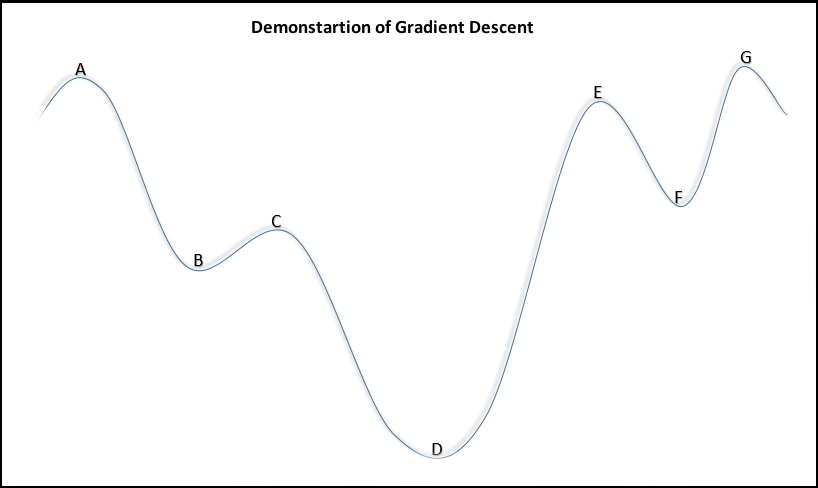

 - To explain the three types of gradient descent, we will use an analogy of a boy with two balls (a deflated ball and an inflated ball) going down a hill. 
 - In this case, the hill represents our cost function, the point D is the lowest point(global minimum) which is our goal.
 - The other valleys(B and F) are also valleys/low points(local minima) but they are not the lowest point(global minimum).

<a id='pv'></a>
### 1.1.1 Plain Vanilla Gradient Descent

 - Plain Vanilla gradient descent behaves like the deflated ball.
 - Initially, it will be going down the hill at a speed equal to the inflated ball.
 - As it approaches point B (a local minimum), it loses momentum and slows down faster than the inflated ball.
 - Since it has reached a local minimum point at point B, it will settle there instead of going past B and C to land at point D (the global minimum).[(Refer to the image)](#fig)
 - This illustrates the main challenges of plain vanilla, since although it settles at a minimum in most cases, it fails to go past a local minimum or even a level plain (referred to as saddle point).


<a id='mgd'></a>
### 1.1.2 Momentum Gradient Descent

* Momentum gradient descent is like the inflated ball.
* Initially it will go down the hill at almost the same rate as the deflated ball.
* However, it will not lose momentum as fast as the deflated ball.
* It will therefore accelerate past point B.
* Its destination however depends on its speed:
    1.	If it is not rolling at a fast speed, it will get close to point C then start heading back towards B. It will keep going to and from both ends of B before finally settling on B
    2.	If it is rolling at a fast speed, it will go past point C and maybe oscillate around point D before settling at there or accelerate and go past point D and E.[(Refer to the image)](#fig)
* The main advantage of momentum over plain-vanilla is that in most cases that it settles at a minimum, it will settle at the global minimum (it will go past the other local minimums.
* Also momentum gradient descent will get to the minimum point faster than plain-vanilla gradient descent.


<a id='nag'></a>
### 1.1.3 Nestrov’s Accelerated Gradient Descent

* Nestrov’s accelerated gradient descent is like the young boy.
* Unlike the balls, the young boy can see ahead and knows if there is another descent past the current local minimum B (beyond point C).
* He will accelerate down the hill from point A to B and tries to keep the momentum to boost him beyond point C onto the steeper descent.
* However, whether he stops at point D or not depends on the speed he descends with from point C and if he perceives there to be another minimum beyond E.[(Refer to the image)](#fig)
* The main advantage of Nestrov’s Accelerated Gradient Descent is that in most cases, it knows when it is approaching a valley and can slow down so as to settle at the valley unlike momentum.
* It therefore settles at a minimum in more cases than momentum.
* It however suffers from the fact that it might settle at other minimums beyond the global minimum at D if it perceives the next valley(F) beyond E.


<a id='GDImportance'></a>
## 1.2 Gradient Descent in Machine Learning
[Go to top](#top)

Gradient Descent is an algorithm that is used in optimizing a function. 
1.	In machine learning, gradient descent is used to find the function/model that best maps a given set of inputs to the output.
 - For example, in a given company:
         - You are given a dataset of inputs (such as labour hours, machine hours and quantity of raw material consumed) and output (quantity manufactured goods).
         - The data has been collected daily over a given time period. 
         - The company wants to develop a model(function) to be used to predict the output given a set inputs. 
         - This model will then be used by the company to gauge the effect of changing any input on the overall output in future.
         - Gradient descent can thus be applied to get the correct weights that will give the best function. 
         - Initially the model will be given random weights for each of the inputs (say uniform weights)
         - The model will then be used to predict the output for the dataset of inputs. The differences between the predicted outputs and the actual outputs (the error) dictate how the weights can be adjusted.
         - If the model has over(under) predicted, the weights are reduced(increased) and the process continues till the best weights are determined.
2.	It is also used in network analysis which is very key in implementing artificial intelligence systems such as the development of robotics, driverless cars, etc.
 - The goal is to train the model to ensure that it is able to decipher and communicate the right message in most reasonable situations.


<a id='StartingSession'></a>
## 1.3 Initializing the session and setting directories
[Go to top](#top)

In [1]:
import os

### 1.3.1 Setting the directories

In [2]:
#from google.colab import drive
#drive.mount('/drive')
#os.chdir('/drive/My Drive/AML/Projects/Question_1/')
print(os.getcwd())


C:\Users\USER\Desktop\Assignment\Question_1


### 1.3.2 Importing the packages

In [3]:
# Computational modules
import numpy as np
import math as mt
import pandas as pd
import gradient_descent #The module we created for gradient descent
from collections import Counter

# Plotting modules
import matplotlib
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline
from IPython.display import HTML, Image

from ipywidgets import interact, interactive, interact_manual, FloatSlider, IntSlider

font = {'size': 18}
matplotlib.rc('font', **font)

<a id='TheSixHumpCamelFunction'></a>
## 1.4 The Six-Hump Camel Function
[Go to top](#top)


 - The six-hump camel function is an optimization test problem
 - The function is evaluated within x={-3,3} and y={-2,2}
 - The function has six local minima of which two are the global minima.
 - The global minima of the function lies at f(x,y)=-1.0316 at (x,y)=(0.0898,-0.7126) and (-0.0898,0.7126)

### 1.4.1 Initializing the Six-Himp Camel Function

 - Loss function is:    $f(x,y)=(4-2.1x^2+x^4/3)x^2+xy+(-4+4y^2)y^2$
 - Partial Derivative with respect to x is:    $df(x,y)=8x - 8.4x^3+2x^5+y$
 - Partial Derivative with respect to y is:    $df(x,y)=x-8y+16y^3$

In [4]:
def fn_loss(x, y):
    return (4 - 2.1*(x**2) + (x**4)/3)*(x**2) + x*y + (-4 + 4*(y**2))*(y**2)
    
def fn_grad1(x, y):
    return 8*x - 8.4*(x**3) + 2*(x**5) + y

def fn_grad2(x, y):
    return x - 8*y + 16*(y**3)

### 1.4.2 Visualizing the 6-Hump Camel Function

#### 1.4.2.1 Plot of the function within its recommended input domain

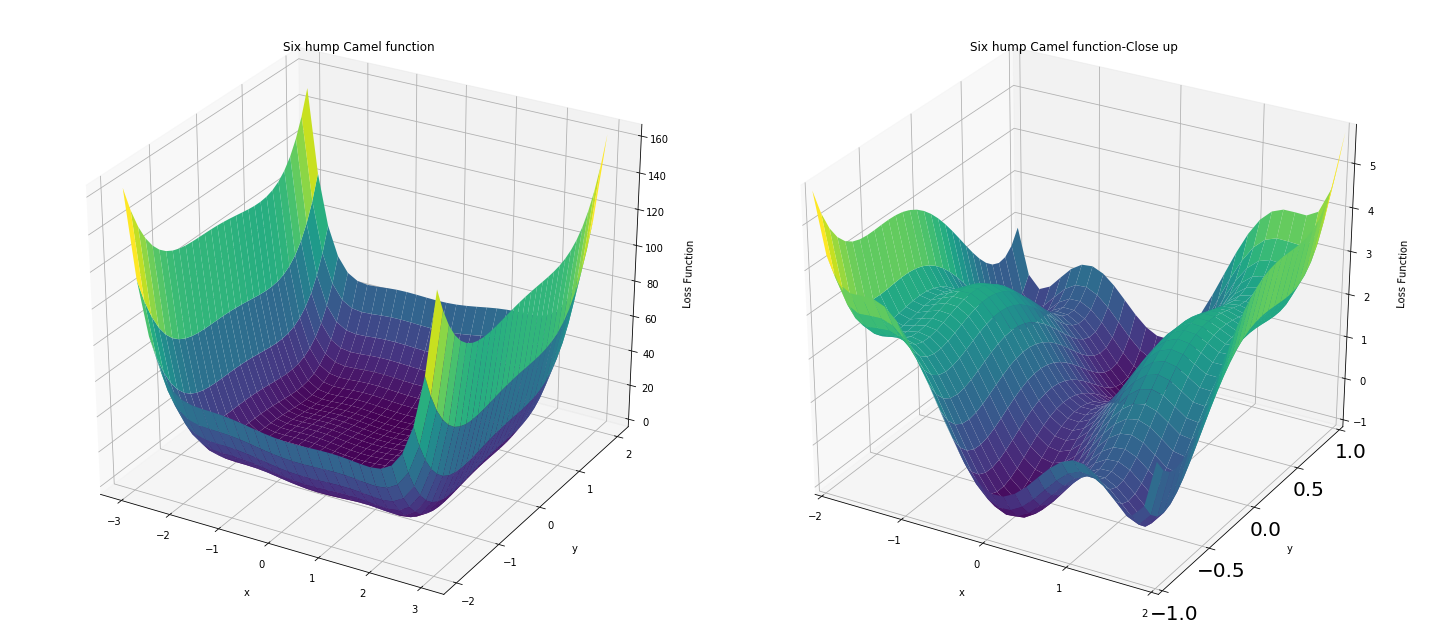

In [5]:
fig = plt.figure(figsize=(20, 9))

ax1 = fig.add_subplot(121, projection='3d')
#ax1 = plt.axes(projection='3d')
x = np.linspace(-3, 3, 30)
y = np.linspace(-2, 2, 30)
X, Y = np.meshgrid(x, y)
Z = fn_loss(X, Y)

font = {'size': 4}
ax1.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax1.set_title('Six hump Camel function');
ax1.set_xlabel('x', labelpad=15)
ax1.set_ylabel('y', labelpad=15)
ax1.set_zlabel('Loss Function', labelpad=15)
ax1.set_yticks([-2,-1,0,1,2]);

ax2 = fig.add_subplot(122, projection='3d')
#ax2 = plt.axes(projection='3d')
ax2.set_ylim3d(-1, 1)
ax2.set_xlim3d(-2, 2)
x = np.linspace(-2, 2, 30)
y = np.linspace(-1, 1, 30)
X, Y = np.meshgrid(x, y)
Z = fn_loss(X, Y)


ax2.yaxis.set_tick_params(labelsize=20)


ax2.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax2.set_title('Six hump Camel function-Close up');
ax2.set_xlabel('x', labelpad=15)
ax2.set_ylabel('y', labelpad=15)
ax2.set_zlabel('Loss Function', labelpad=15)
ax2.set_xticks([-2,-1,0,1,2])
ax2.set_yticks([-1,-0.5,0,0.5,1]);

plt.tight_layout()
plt.show()

#Save image for report
fig.savefig('6_hump_plot.png')

<br>

#### 1.4.2.2 Interactive Plot

In [6]:
## Developing the plotting function
def plot_view(xmin,xmax,ymin,ymax):
  fig = plt.figure(figsize=(10,9))
  ax = fig.add_subplot(111, projection='3d')

  # Make data.
  X = np.arange(xmin, xmax, 0.0025)
  #xlen = len(X)
  Y = np.arange(ymin,ymax, 0.0025)
  #ylen = len(Y)
  X, Y = np.meshgrid(X, Y)
  Z = fn_loss(X,Y)
  surf = ax.plot_surface(X, Y, Z, linewidth=0,cmap='viridis')
  ax.set_xlabel('x', labelpad=15)
  ax.set_ylabel('y', labelpad=15)
  ax.set_zlabel('Loss Function', labelpad=15)             
  ax.set_title(label = 'Interactive six hump plot', loc='left')
  ax.set_xticks(np.arange(xmin, xmax, step=1))
  ax.set_yticks(np.arange(xmin, xmax, step=1));
  plt.show()

**This is an interactive module for demonstrating the plot surface**
 - **To run this, you need to select the initial value of x and y and the plot adjusts**

In [7]:
interactive_six_hump_cont  = interactive(plot_view, xmin=FloatSlider(description='Minimum x', min=-3, max=3, step=0.1,readout_format = '.1f',value = -3),
                                         xmax=FloatSlider(description='Maximum x', min=-3, max=3, step=0.1,readout_format = '.1f',value = 3),
                                         ymin=FloatSlider(description='Minimum y',min=-2, max=2, step=0.1,readout_format = '.1f',value = -2),
                                         ymax =FloatSlider(description='Maximum y',min=-2, max=2, step=0.1,readout_format = '.1f',value = 2))
output = interactive_six_hump_cont.children[4]
output.layout.height = '550px'
interactive_six_hump_cont  

interactive(children=(FloatSlider(value=-3.0, description='Minimum x', max=3.0, min=-3.0, readout_format='.1f'…

<a id='InitializeGD'></a>
## 1.5 Initializing the Gradient Descent Exercise
[Go to top](#top)

### 1.5.1 Calling the Gradient Descent Class

In [8]:
solver = gradient_descent.GradientDescent(fn_loss = fn_loss, fn_grad1 = fn_grad1, fn_grad2 = fn_grad2)

### 1.5.2 Determinining the maximum step size

 - Our choice starting point of (x, y):

In [9]:
x_init = 3
y_init = 2

In [10]:
#Step size therefore should limit the movement within the recommended bounds of x and y:
step_size1 = np.abs((x_init*2)/(fn_grad1(x_init,y_init)))
step_size2 = np.abs((y_init*2)/(fn_grad2(x_init,y_init)))
step_size = np.minimum(step_size1,step_size2)

print('The maximum step size is: {}'.format(np.round(step_size,3)))

The maximum step size is: 0.021


- For a step-size above 0.021, the fuction will go beyond its recommended input domain of (-3,3) and (-2,2)
- To make sure it converges, we limit the step size to the maximimum above.

<a id='PlainVanillaGD'></a>
## 1.6 Plain Vanilla Gradient Descent
[Go to top](#top)

### 1.6.1 Interactive Demonstartion of Plain Vanilla

**This is an interactive module for demonstrating gradient descent**
 - **To run this, you need to select the initial value of x and y**
 - **After selecting the initial values, you click "Run Interact" button to visualize the gradient descent**

In [11]:
interactive_plain_vanilla_gd_manual = interact_manual(solver.find_min, x_init=FloatSlider(description='Initial x', min=-3, max=3, step=0.1,readout_format = '.1f',value = 3),
                                                 y_init=FloatSlider(description='Initial y', min=-2, max=2, step=0.1,readout_format = '.1f',value = 2),
                                                 max_iter=IntSlider( min=0, max=2000, step=1,value = 2000),
                                                 eta=FloatSlider(description='Step size',min=0.001, max=0.02, step=0.001,readout_format = '.3f',value = 0.001),
                                                 tol =FloatSlider(description='Tolerance',min=0, max= 0.001, step=1e-5,readout_format = '.4f',value =  1e-5))

interactive_plain_vanilla_gd_manual

interactive(children=(FloatSlider(value=3.0, description='Initial x', max=3.0, min=-3.0, readout_format='.1f')…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

<br>

### 1.6.2 Animated Path of the loss function for a step size of 0.001

**Generating the data for our animation**

In [12]:
solver.plain_vanilla(x_init = 2, y_init = 1, max_iter = 2000, eta = 0.001, tol = 0.1)
x_data = solver.x_path
y_data = solver.y_path
z_data = solver.loss_path
x_min = solver.x_at_min
y_min = solver.x_at_min
z_min = fn_loss(x_min, y_min)
loss = solver.loss_fn_min
iterations = solver.num_iters
nfr = solver.num_iters+1 # we set number of frames
fps = 20 # Frame per sec
xs = []
ys = []
zs = []
ss = np.arange(0,nfr,1)
for s in ss:
    xs.append(x_data[s])
    ys.append(y_data[s])
    zs.append(z_data[s])
    

Converged in 329 steps, step size= 0.001. Loss fn= 2.1049 at (x, y) = (1.6099, 0.5809)


**The function below has three options at the last part**
1. To view the animation on the notebook, uncomment the visualize option(option1) and comment the other two options and run the cell
2. To view the final output(image), uncomment the plot option(option2) and comment the other options, then run the cell
3. To save the final output(gif), uncomment the save option(option3) and comment the other options, then run the cell. The saved animation will be stored in your working directory.
<br>    **A copy of the animation is available on the readme.md file on GitHub**

**We have displayed the final image since the animation is too big and cannot be uploaded on GitHub**

**Points to Note**
- **The animation is computed at a high tolerance of 0.1**
- **For our analysis, we will use a tolerance of 0.00001(1e-5)**

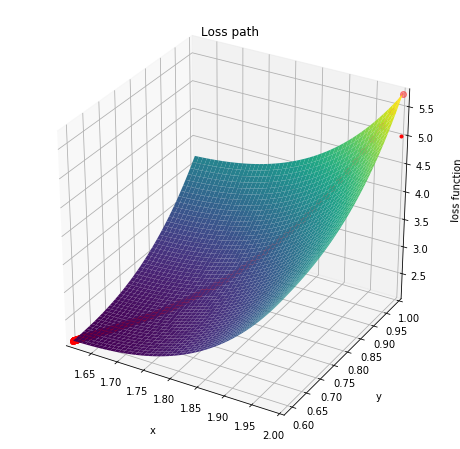

In [13]:
# plt.style.use('dark_background')
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
xc = np.linspace(np.min(x_data),np.max(x_data),50)
yc = np.linspace(np.min(y_data),np.max(y_data),50)
X, Y = np.meshgrid(xc, yc)
Z = fn_loss(X, Y)

#Surface plot
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')
line, = ax.plot([], [], [], 'r-', label = 'Gradient descent', lw = 1.5)
sct, = ax.plot([], [], [], marker = 'o', markersize=3, color = 'red')
display_value = ax.text(1.6, 2.0, 100, '')

def update(ifrm, xa, ya, za):
    sct.set_data(xa[ifrm], ya[ifrm])
    sct.set_3d_properties(za[ifrm])
    line.set_data(xa[:ifrm], ya[:ifrm])
    line.set_3d_properties(za[:ifrm])
    display_value.set_text('Min = ' + str(np.round(za[ifrm],4)))
ax.set_xlabel('x', labelpad=15)
ax.set_ylabel('y', labelpad=15)
ax.set_zlabel('loss function', labelpad=15)
ax.set_title('Loss path')
ax.set_xlim(np.min(x_data),np.max(x_data))
ax.set_ylim(np.min(y_data),np.max(y_data))
ax.set_zlim(np.min(z_data),np.max(z_data))
ani = animation.FuncAnimation(fig, update, nfr, fargs=(xs,ys,zs), interval=200/fps,repeat = True)

#Option1: Visualize the animation
#HTML(ani.to_jshtml())

#Option2: Plot the final image
ax.plot(x_data, y_data, z_data, marker = 'o', color = 'r', alpha = .4, label = 'Gradient descent')
plt.show()

#Option3: Save the animation as mp4 video file 
#ani.save('loss_path.gif',writer='pillow')

### 1.6.3 Select Plots

<a id='PlainVanillaGD_0.001'></a>
#### 1.6.3.1 Path of the loss function for a step size of 0.001

[Go to Momentum at step size 0.001](#MomentumGD_0.001)                         
[Go to Nestrov's at step size 0.001](#NestrovsAGD_0.001)

**For our comparison of the three types of gradient descent, we will use a step size of 0.01**

In [14]:
solver.plain_vanilla(x_init, y_init, max_iter = 2000, eta = 0.001, tol = 1e-5)

Converged in 1599 steps, step size= 0.001. Loss fn= 2.1043 at (x, y) = (1.6071, 0.5687)


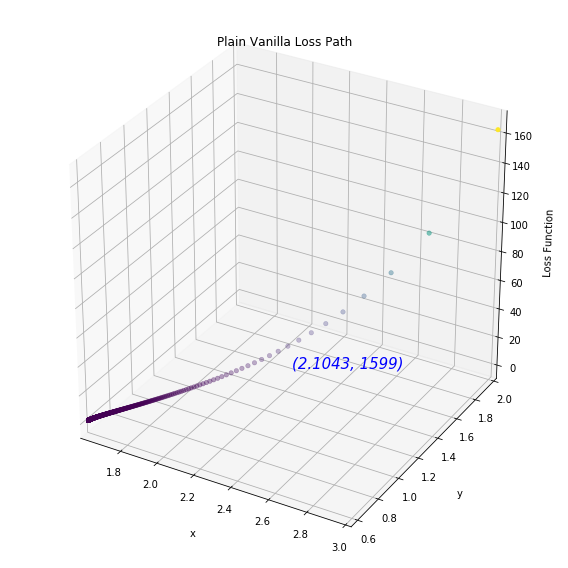

In [15]:
# Vizualize loss path
x1 = solver.x_path
y1 = solver.y_path
z1 = solver.loss_path
loss_min = np.round(solver.loss_fn_min,4)
iterations = solver.num_iters
x_mid = (np.min(x1)+np.max(x1))/2
y_mid = (np.min(y1)+np.max(y1))/2
z_mid = fn_loss(x_mid, y_mid)
font = {'size': 12}

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')

ax.set_xlim3d(np.min(x1), np.max(x1))
#ax.axis('equal')
ax.set_ylim3d(np.min(y1), np.max(y1))
ax.scatter(x1, y1, z1, c=z1, cmap='viridis', linewidth=0.5);
ax.set_title('Plain Vanilla Loss Path');
ax.set_xlabel('x', labelpad=15)
ax.set_ylabel('y', labelpad=15)
ax.set_zlabel('Loss Function', labelpad=12.5)
ax.text(x_mid, y_mid, z_mid, (loss_min, iterations), color='b', fontsize=15, style='italic');
plt.tight_layout()
fig.savefig('loss_path1.png')

- The function converges after 1,599 steps.
- However, it does not converge at the global minimum.
- Instead, it converges at the local minima where $(x,y)=(1.6071,0.5687)$ and $f(x,y)=2.1043$
- This is a clear sign of the weaknesses of plain-vanilla gradient descent

#### 1.6.3.2 Path of the loss function for a step size of 0.01

In [16]:
solver.plain_vanilla(x_init, y_init, max_iter = 2000, eta = 0.01, tol = 1e-5)

Converged in 152 steps, step size= 0.01. Loss fn= -1.0316 at (x, y) = (-0.0898, 0.7127)


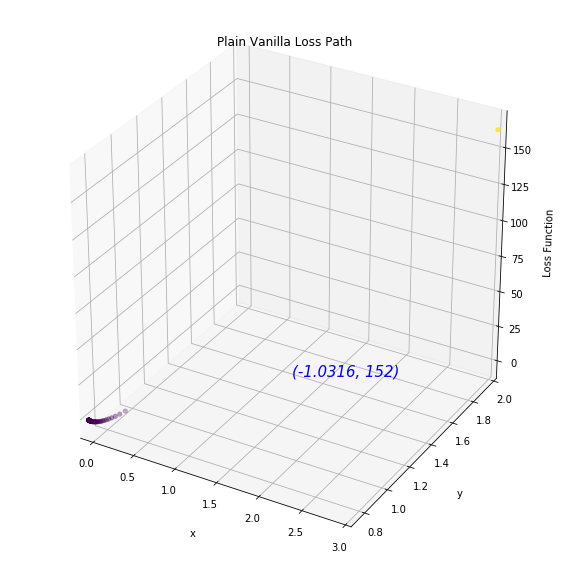

In [17]:
# Vizualize loss path
x1 = solver.x_path
y1 = solver.y_path
z1 = solver.loss_path
loss_min = np.round(solver.loss_fn_min,4)
iterations = solver.num_iters
x_mid = (np.min(x1)+np.max(x1))/2
y_mid = (np.min(y1)+np.max(y1))/2
z_mid = fn_loss(x_mid, y_mid)
font = {'size': 12}

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')

ax.set_xlim3d(np.min(x1), np.max(x1))
#ax.axis('equal')
ax.set_ylim3d(np.min(y1), np.max(y1))
ax.scatter(x1, y1, z1, c=z1, cmap='viridis', linewidth=0.5);
ax.set_title('Plain Vanilla Loss Path');
ax.set_xlabel('x', labelpad=15)
ax.set_ylabel('y', labelpad=15)
ax.set_zlabel('Loss Function', labelpad=12.5)
ax.text(x_mid, y_mid, z_mid, (loss_min, iterations), color='b', fontsize=15, style='italic');
plt.tight_layout()

- The function converges after 152 iterations at the global minimum of the function(the point where $f(x,y)=-1.0316$
- This is an indication that at large step sizes(closer to the maximum), the function will converge at the global maximum

#### 1.6.3.3 Minimum of loss function at maximum step size of 0.02

In [18]:
solver.plain_vanilla(x_init, y_init, max_iter = 2000, eta = 0.02, tol = 1e-5)

Converged in 62 steps, step size= 0.02. Loss fn= -1.0316 at (x, y) = (0.0898, -0.7127)


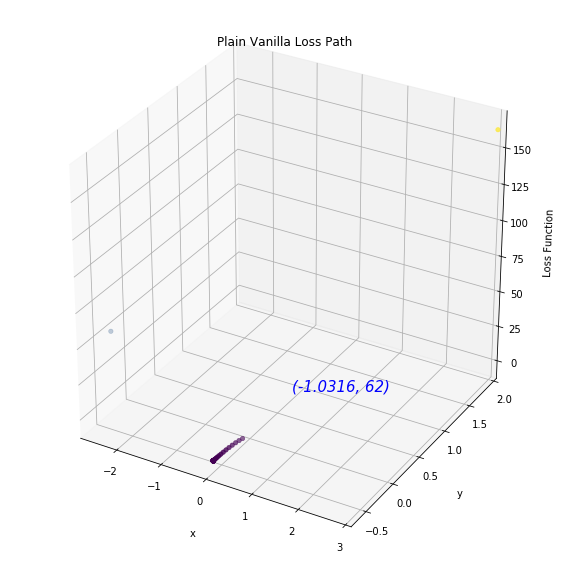

In [19]:
# Vizualize loss path
x1 = solver.x_path
y1 = solver.y_path
z1 = solver.loss_path
loss_min = np.round(solver.loss_fn_min,4)
iterations = solver.num_iters
x_mid = (np.min(x1)+np.max(x1))/2
y_mid = (np.min(y1)+np.max(y1))/2
z_mid = fn_loss(x_mid, y_mid)
font = {'size': 12}

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')

ax.set_xlim3d(np.min(x1), np.max(x1))
#ax.axis('equal')
ax.set_ylim3d(np.min(y1), np.max(y1))
ax.scatter(x1, y1, z1, c=z1, cmap='viridis', linewidth=0.5);
ax.set_title('Plain Vanilla Loss Path');
ax.set_xlabel('x', labelpad=15)
ax.set_ylabel('y', labelpad=15)
ax.set_zlabel('Loss Function', labelpad=12.5)
ax.text(x_mid, y_mid, z_mid, (loss_min, iterations), color='b', fontsize=15, style='italic');
plt.tight_layout()

- When the step size is increased from 0.01 to 0.02, the number of iterations needed to converge decrese from 152 to 62.
- The function converges also at the global minimum
- At large step sizes, we can say that the function will converge in most cases to the global minimum

### 1.6.4 Experimenting with many step sizes

**Generating the data**

In [20]:
eta = np.linspace(0.0005,0.02,num=50, endpoint=True)
loss = []
iterations = []
for z in eta:
    solver.plain_vanilla(x_init, y_init, max_iter = 2000, eta = z, tol = 1e-5)
    loss_i = np.round(solver.loss_fn_min, 4)
    iters = solver.num_iters
    loss.append(loss_i)
    iterations.append(iters)
    

Did not converge
Converged in 1782 steps, step size= 0.0009. Loss fn= 2.1043 at (x, y) = (1.6071, 0.5687)
Converged in 1233 steps, step size= 0.0013. Loss fn= 2.1043 at (x, y) = (1.6071, 0.5687)
Converged in 941 steps, step size= 0.0017. Loss fn= 2.1043 at (x, y) = (1.6071, 0.5687)
Converged in 761 steps, step size= 0.0021. Loss fn= 2.1043 at (x, y) = (1.6071, 0.5687)
Converged in 639 steps, step size= 0.0025. Loss fn= 2.1043 at (x, y) = (1.6071, 0.5687)
Converged in 550 steps, step size= 0.0029. Loss fn= 2.1043 at (x, y) = (1.6071, 0.5687)
Converged in 483 steps, step size= 0.0033. Loss fn= 2.1043 at (x, y) = (1.6071, 0.5687)
Converged in 431 steps, step size= 0.0037. Loss fn= 2.1043 at (x, y) = (1.6071, 0.5687)
Converged in 389 steps, step size= 0.0041. Loss fn= 2.1043 at (x, y) = (1.6071, 0.5687)
Converged in 357 steps, step size= 0.0045. Loss fn= 2.1043 at (x, y) = (1.6071, 0.5687)
Converged in 331 steps, step size= 0.0049. Loss fn= 2.1043 at (x, y) = (1.6071, 0.5687)
Converged in 

 - **The plot below shows the effect of incresing the step size on the number of steps needed for the function to converge at a minimum**

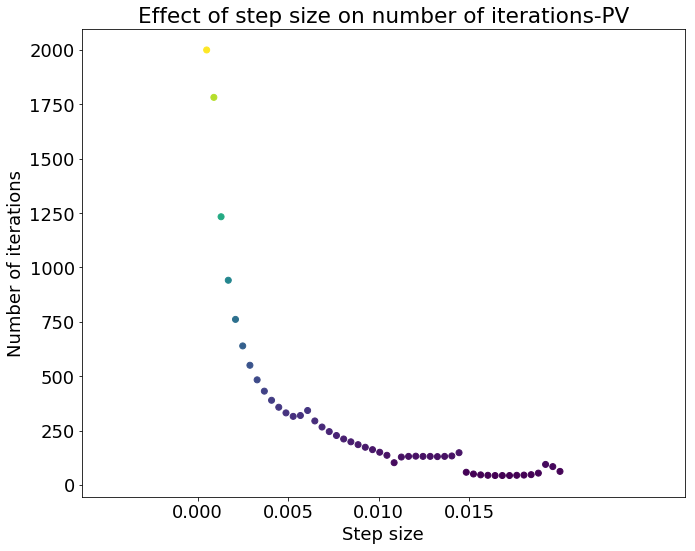

In [21]:
#Effect of step size on number of iterations needed for convergence
font = {'size': 18}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(eta, iterations, c=iterations)
ax1.set_xlabel('Step size')
ax1.set_ylabel('Number of iterations')
ax1.set_title('Effect of step size on number of iterations-PV')
ax1.set_xticks(np.arange(0,0.02,0.005))
plt.tight_layout()
fig.savefig('iterations1.png')

 - **The plot below shows the effect of incresing the minimum achieved by the loss function when it converges to a minimum**

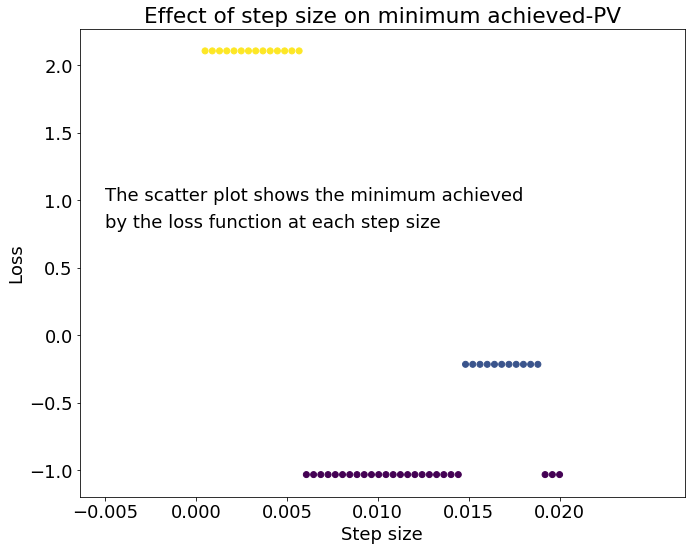

In [22]:
#Effect of step size on point of convergence
font = {'size': 18}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(eta, loss, c=loss)
ax1.set_xlabel('Step size')
ax1.set_ylabel('Loss')
ax1.set_title('Effect of step size on minimum achieved-PV')
ax1.text(-0.005,1,('The scatter plot shows the minimum achieved'))
ax1.text(-0.005,0.8,('by the loss function at each step size'))
ax1.set_xticks(np.arange(-0.005,0.025,0.005))
plt.tight_layout()
fig.savefig('min_loss1.png')

- **The plot below shows the distribution of the minimums achieved**

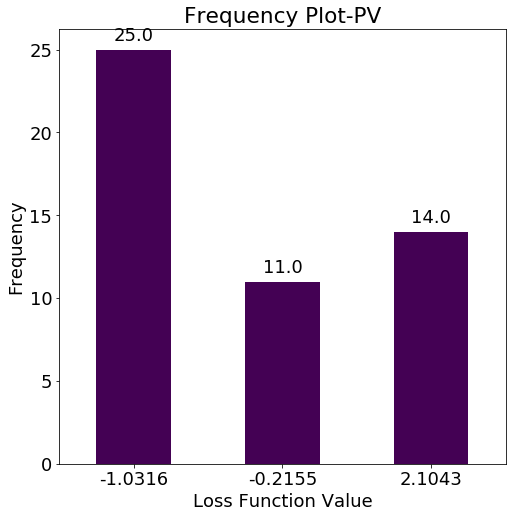

In [23]:
#Distribution of the minimas achieved
df = pd.DataFrame({'freq': loss})
x = df.groupby('freq', as_index=False).size()
font= {'size': 12}
ax = x.plot(figsize=(8,8), kind='bar', title = 'Frequency Plot-PV', cmap='viridis')
ax.set_xlabel("Loss Function Value")
ax.set_ylabel("Frequency")
plt.show
#Rotate labels on x-axis
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
# For each bar: Place a label
def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        # Number of points between bar and label. Change to your liking.
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.1f}".format(y_value)
        ax.annotate(label,(x_value, y_value), xytext=(0, space),
                    textcoords="offset points",ha='center',va=va)
add_value_labels(ax)
plt.savefig('min_loss_freq1.png')

In [24]:
count= Counter(loss)
count

Counter({2.1043: 14, -1.0316: 25, -0.2155: 11})

**Key Obsevations**

- From the chart above, it can be deduced that at very small step sizes, the function will converge at the nearest local minimum which is at $(x,y)=(1.6071,0.5687)$
- Increasing the step sizes eventually leads to the function converging at the second nearest minima which is also a global minimum at $(x,y)=(-0.0898,0.7127)$
- A further in step size leads to the function going past the initial global minimum to another minimum which is not the global minimum at $(x,y)=(-1.7036,0.7961)$ before again settling at the second global minimum at $(x,y)=(0.0898,-0.7127)$
- Maintaining the step size within the bounds determined(less than 0.021) ensures that the function converges over all instances.
- It however converges at the global minimum only 50% of the time which is a highlighter of its greatest weakness.
- Its other weakness comes about when it gets close to the a minimum. The algorithm converges slowly leading to the need for many iterations for the function to converge

<a id='MomentumGD'></a>
## 1.7 Momentum Gradient Descent
[Go to top](#top)

- Momentum gradient descent was formulated in a bid to addresses the key limitations of plain-vanilla:
    1. Speed of convergence and 
    2. Inability to go past local minima to the global minima at small step sizes. 

### 1.7.1 Interactive Demonstartion of Momentum Gradient Descent

**This is an interactive module for demonstrating gradient descent**
 - **To run this, you need to select the initial value of x and y**
 - **After selecting the initial values, you click "Run Interact" button to visualize the gradient descent**

In [25]:
interactive_momentun_gd_manual = interact_manual(solver.find_min2, x_init=FloatSlider(description='Initial x', min=-3, max=3, step=0.1,readout_format = '.1f',value = 3),
                                                 y_init=FloatSlider(description='Initial y', min=-2, max=2, step=0.1,readout_format = '.1f',value = 2),
                                                 max_iter=IntSlider( min=0, max=2000, step=1,value = 2000),
                                                 eta=FloatSlider(description='Step size',min=0.001, max=0.0065, step=0.0005,readout_format = '.3f',value = 0.001),
                                                 tol =FloatSlider(description='Tolerance',min=0, max= 0.001, step=1e-5,readout_format = '.4f',value =  1e-5),
                                                 alpha =FloatSlider(description='Alpha',min=0, max= 0.95, step=0.05,readout_format = '.4f',value =  0.9))

interactive_momentun_gd_manual

interactive(children=(FloatSlider(value=3.0, description='Initial x', max=3.0, min=-3.0, readout_format='.1f')…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

<a id='MomentumGD_0.001'></a>
### 1.7.2 Path of the loss function for a step size of 0.001

In [26]:
solver.momentum(x_init, y_init, max_iter = 2000, eta = 0.001, tol = 1e-5, alpha = 0.9)

Converged in 238 steps, step size= 0.001. Loss fn= 2.1043 at (x, y) = (-1.6071, -0.5687)


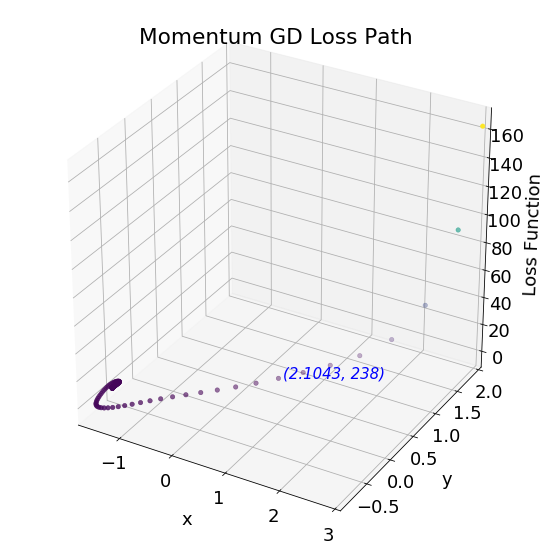

In [27]:
# Vizualize loss path
x1 = solver.x_path
y1 = solver.y_path
z1 = solver.loss_path
loss_min = np.round(solver.loss_fn_min,4)
iterations = solver.num_iters
x_mid = (np.min(x1)+np.max(x1))/2
y_mid = (np.min(y1)+np.max(y1))/2
z_mid = fn_loss(x_mid, y_mid)
font = {'size': 12}

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')

ax.set_xlim3d(np.min(x1), np.max(x1))
ax.set_ylim3d(np.min(y1), np.max(y1))
ax.scatter(x1, y1, z1, c=z1, cmap='viridis', linewidth=0.5);
ax.set_title('Momentum GD Loss Path');
ax.set_xlabel('x', labelpad=15)
ax.set_ylabel('y', labelpad=15)
ax.set_zlabel('Loss Function', labelpad=12.5)
ax.text(x_mid, y_mid, z_mid, (loss_min, iterations), color='b', fontsize=15, style='italic');
plt.tight_layout()
fig.savefig('loss_path2.png')

**NOTES**

- The function converges at $(x,y)=(-1.6071,-0.5687)$ after 238 iterations
- This is however not a global minimum.
- Based on the observation, we can conclude that momentum gradient descent:
    1. Skipped the other minimas achieved under plain vanilla
    2. Converged in fewer steps than under plain vanilla for the same step size(Refer to [Plain Vanilla at 0.001](#PlainVanillaGD_0.001))
- While this is a good indicator that it achieves its purpose(skipping past the local minima) it also shows that the function went past the global minima
- This is one of the weaknesses of momentum gradient descent(the steps at each iteration are not informed(the model is blind))
- The denseness of the plot towards the minimum another weaknesses of the momentum gradient descent: if it skips a minima but doesn't go past the next maxima, the function will oscillate around the minima till it settles at the minima

<br>[Go back to Nestrov's at step size 0.001](#NestrovsAGD_0.001)

### 1.7.3 Experimenting with many step sizes

**Generating the data**

In [28]:
eta = np.linspace(0.0005,0.02,num=50, endpoint=True)
loss = []
iterations = []
for z in eta:
    solver.momentum(x_init, y_init, max_iter = 2000, eta = z, tol = 1e-5, alpha=0.9)
    loss_i = np.round(solver.loss_fn_min, 4)
    iters = solver.num_iters
    loss.append(loss_i)
    iterations.append(iters)
        

Converged in 275 steps, step size= 0.0005. Loss fn= -1.0316 at (x, y) = (0.0898, -0.7127)
Converged in 266 steps, step size= 0.0009. Loss fn= 2.1043 at (x, y) = (-1.6071, -0.5687)
Converged in 270 steps, step size= 0.0013. Loss fn= 2.1043 at (x, y) = (-1.6071, -0.5687)
Converged in 296 steps, step size= 0.0017. Loss fn= -1.0316 at (x, y) = (-0.0898, 0.7127)
Converged in 268 steps, step size= 0.0021. Loss fn= -1.0316 at (x, y) = (-0.0898, 0.7127)
Converged in 266 steps, step size= 0.0025. Loss fn= -1.0316 at (x, y) = (-0.0898, 0.7127)
Converged in 271 steps, step size= 0.0029. Loss fn= -1.0316 at (x, y) = (-0.0898, 0.7127)
Converged in 239 steps, step size= 0.0033. Loss fn= 2.1043 at (x, y) = (1.6071, 0.5687)
Converged in 268 steps, step size= 0.0037. Loss fn= -1.0316 at (x, y) = (-0.0898, 0.7127)
Converged in 272 steps, step size= 0.0041. Loss fn= -1.0316 at (x, y) = (-0.0898, 0.7127)
Converged in 257 steps, step size= 0.0045. Loss fn= -1.0316 at (x, y) = (-0.0898, 0.7127)
Converged in

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


 - **The plot below shows the effect of incresing the step size on the number of steps needed for the function to converge at a minimum**

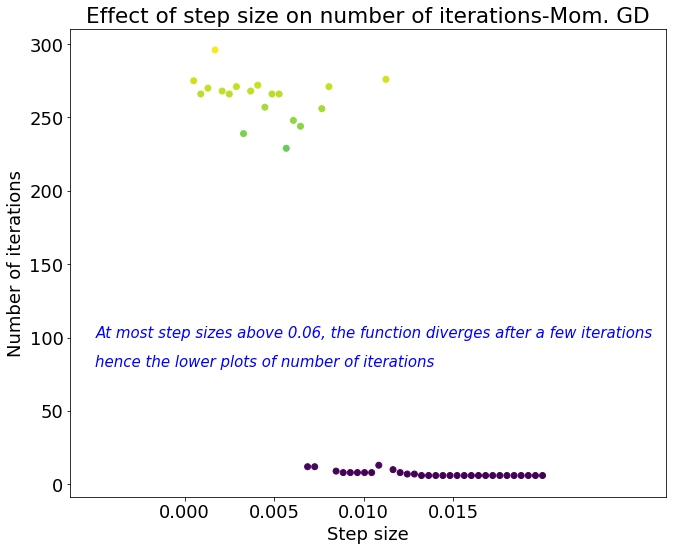

In [29]:
#Effect of step size on number of iterations
font = {'size': 18}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(eta, iterations, c=iterations)
ax1.set_xlabel('Step size')
ax1.set_ylabel('Number of iterations')
ax1.set_title('Effect of step size on number of iterations-Mom. GD')
ax1.text(-0.005, 100, ('At most step sizes above 0.06, the function diverges after a few iterations'), color='b', fontsize=15, style='italic');
ax1.text(-0.005, 80, ('hence the lower plots of number of iterations'), color='b', fontsize=15, style='italic');

ax1.set_xticks(np.arange(0,0.02,0.005))
plt.tight_layout()
fig.savefig('iterations2.png')

 - **The plot below shows the effect of incresing the minimum achieved by the loss function when it converges to a minimum**

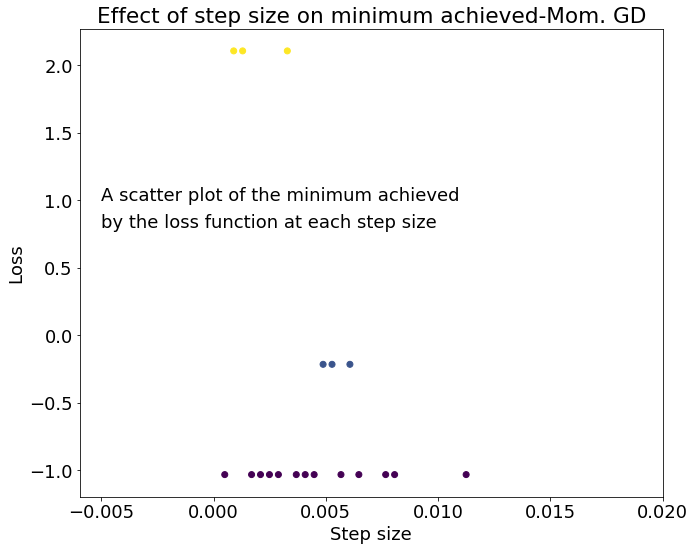

In [30]:
#Effect of step size on point of convergence
font = {'size': 18}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(eta, loss, c=loss)
ax1.set_xlabel('Step size')
ax1.set_ylabel('Loss')
ax1.set_title('Effect of step size on minimum achieved-Mom. GD')
ax1.text(-0.005,1,('A scatter plot of the minimum achieved'))
ax1.text(-0.005,0.8,('by the loss function at each step size'))
ax1.set_xticks(np.arange(-0.005,0.025,0.005))
plt.tight_layout()
fig.savefig('min_loss2.png')

- **The plot below shows the distribution of the minimums achieved**
    - *Ignore the last bar of infinity*

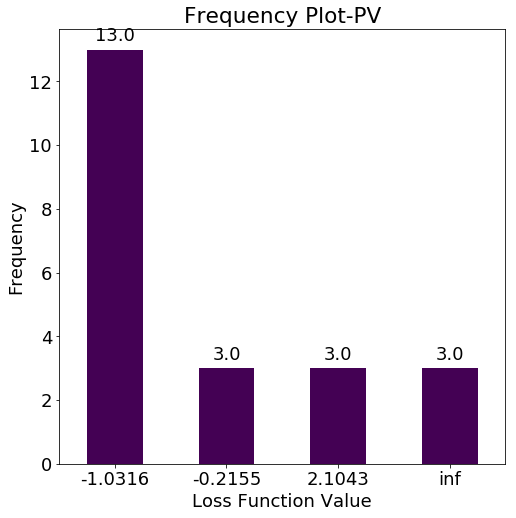

In [31]:
#Distribution of the minimas achieved
df = pd.DataFrame({'freq': loss})
x = df.groupby('freq', as_index=False).size()
font= {'size': 12}
ax = x.plot(figsize=(8,8), kind='bar', title = 'Frequency Plot-PV', cmap='viridis')
ax.set_xlabel("Loss Function Value")
ax.set_ylabel("Frequency")
plt.show
#Rotate labels on x-axis
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
# For each bar: Place a label
def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        # Number of points between bar and label. Change to your liking.
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.1f}".format(y_value)
        ax.annotate(label,(x_value, y_value), xytext=(0, space),
                    textcoords="offset points",ha='center',va=va)
add_value_labels(ax)
plt.savefig('min_loss_freq2.png')

**Key Obsevations**

- Of the 16 times that the function converges, it performs exceedingly better than plain-vanilla since it converges at the global minima 81% of the time
- What is of concern however, is the fact that the function does not converge around 70% of the time.
- This is the greatest weakness since it shows that momentum gradient descent is not forward looking, i.e:
    - The step size does not reduce when it approaches a minimum and this is because its gradient is calculated from its current position

<a id='NestAccGD'></a>
## 1.8 Nestrov's Accelerated Gradient Descent
[Go to top](#top)

- The Nestrov's Accelerated gradient descent was formulated to address the weaknesses of momentum, i.e: its inability to reduce momentum when it approaches a minimum causing it to either:
    1. Diverging many times by going beyond the recommended bounded region
    2. Do oscillations around a minimum before converging

### 1.8.1 Interactive Demonstartion of Nestrov's Accelerated Gradient Descent

**This is an interactive module for demonstrating gradient descent**
 - **To run this, you need to select the initial value of x and y**
 - **After selecting the initial values, you click "Run Interact" button to visualize the gradient descent**

In [32]:
interactive_nestrovs_gd_manual = interact_manual(solver.find_min3, x_init=FloatSlider(description='Initial x', min=-3, max=3, step=0.1,readout_format = '.1f',value = 3),
                                                      y_init=FloatSlider(description='Initial y', min=-2, max=2, step=0.1,readout_format = '.1f',value = 2),
                                                      max_iter=IntSlider( min=0, max=2000, step=1,value = 2000),
                                                      eta=FloatSlider(description='Step size',min=0.001, max=0.0065, step=0.0005,readout_format = '.3f',value = 0.001),
                                                      tol =FloatSlider(description='Tolerance',min=0, max= 0.001, step=1e-5,readout_format = '.4f',value =  1e-5),
                                                      alpha =FloatSlider(description='Alpha',min=0, max= 0.95, step=0.05,readout_format = '.4f',value =  0.95))

interactive_nestrovs_gd_manual

interactive(children=(FloatSlider(value=3.0, description='Initial x', max=3.0, min=-3.0, readout_format='.1f')…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

### 1.8.2 Path of the loss function for a step size of 0.001
<a id='NestrovsAGD_0.001'></a>

In [33]:
solver.nag(x_init, y_init, max_iter = 2000, eta = 0.001, tol = 1e-5, alpha = 0.9)

Converged in 201 steps, step size= 0.001. Loss fn= -1.0316 at (x, y) = (0.0898, -0.7127)


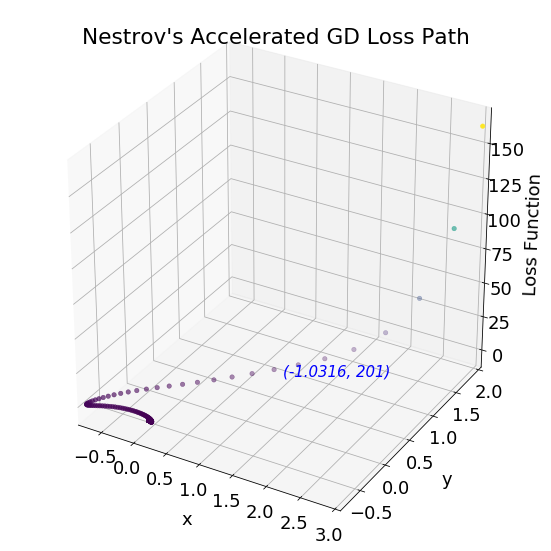

In [34]:
# Vizualize loss path
x1 = solver.x_path
y1 = solver.y_path
z1 = solver.loss_path
loss_min = np.round(solver.loss_fn_min,4)
iterations = solver.num_iters
x_mid = (np.min(x1)+np.max(x1))/2
y_mid = (np.min(y1)+np.max(y1))/2
z_mid = fn_loss(x_mid, y_mid)
font = {'size': 12}

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')

ax.set_xlim3d(np.min(x1), np.max(x1))
#ax.axis('equal')
ax.set_ylim3d(np.min(y1), np.max(y1))
ax.scatter(x1, y1, z1, c=z1, cmap='viridis', linewidth=0.5);
ax.set_title("Nestrov's Accelerated GD Loss Path");
ax.set_xlabel('x', labelpad=15)
ax.set_ylabel('y', labelpad=15)
ax.set_zlabel('Loss Function', labelpad=12.5)
ax.text(x_mid, y_mid, z_mid, (loss_min, iterations), color='b', fontsize=15, style='italic');
plt.tight_layout()
fig.savefig('loss_path3.png')

**NOTES**

- The function converges at $(x,y)=(0.0898,-0.7127)$ after 201 iterations at a global minimum.
- The function converged in fewer steps than under plain vanilla(1,599 steps) and momentum gradient descent(238 steps) for the same step size and bettered them further by converging at a global minimum(Refer to [Plain Vanilla at 0.001](#PlainVanillaGD_0.001) and [Momentum Gradient Descent at 0.001](#MomentumGD_0.001) )

### 1.8.3 Experimenting with many step sizes

**Generating the data**

In [35]:
eta = np.linspace(0.0005,0.02,num=50, endpoint=True)
loss = []
iterations = []
for z in eta:
    solver.nag(x_init, y_init, max_iter = 2000, eta = z, tol = 1e-5, alpha=0.9)
    loss_i = np.round(solver.loss_fn_min, 4)
    iters = solver.num_iters
    loss.append(loss_i)
    iterations.append(iters)


Converged in 236 steps, step size= 0.0005. Loss fn= -1.0316 at (x, y) = (0.0898, -0.7126)
Converged in 214 steps, step size= 0.0009. Loss fn= -1.0316 at (x, y) = (0.0898, -0.7127)
Converged in 195 steps, step size= 0.0013. Loss fn= 2.1043 at (x, y) = (-1.6071, -0.5687)
Converged in 171 steps, step size= 0.0017. Loss fn= 2.1043 at (x, y) = (-1.6071, -0.5687)
Converged in 194 steps, step size= 0.0021. Loss fn= 2.1043 at (x, y) = (-1.6071, -0.5687)
Converged in 150 steps, step size= 0.0025. Loss fn= -1.0316 at (x, y) = (0.0897, -0.7127)
Converged in 196 steps, step size= 0.0029. Loss fn= -1.0316 at (x, y) = (0.0898, -0.7127)
Converged in 198 steps, step size= 0.0033. Loss fn= -1.0316 at (x, y) = (0.0898, -0.7127)
Converged in 165 steps, step size= 0.0037. Loss fn= -1.0316 at (x, y) = (0.0898, -0.7127)
Converged in 136 steps, step size= 0.0041. Loss fn= -1.0316 at (x, y) = (0.0898, -0.7127)
Converged in 148 steps, step size= 0.0045. Loss fn= -1.0316 at (x, y) = (0.0899, -0.7127)
Converged 

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


 - **The plot below shows the effect of incresing the step size on the number of steps needed for the function to converge at a minimum**

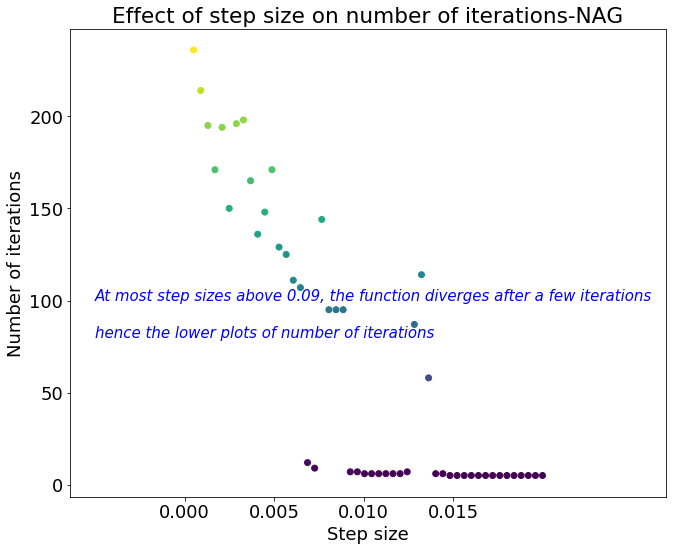

In [36]:
#Effect of step size on number of iterations
font = {'size': 18}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(eta, iterations, c=iterations)
ax1.set_xlabel('Step size')
ax1.set_ylabel('Number of iterations')
ax1.set_title('Effect of step size on number of iterations-NAG')
ax1.text(-0.005, 100, ('At most step sizes above 0.09, the function diverges after a few iterations'), color='b', fontsize=15, style='italic');
ax1.text(-0.005, 80, ('hence the lower plots of number of iterations'), color='b', fontsize=15, style='italic');

ax1.set_xticks(np.arange(0,0.02,0.005))
plt.tight_layout()
fig.savefig('iterations3.png')

 - **The plot below shows the effect of incresing the minimum achieved by the loss function when it converges to a minimum**

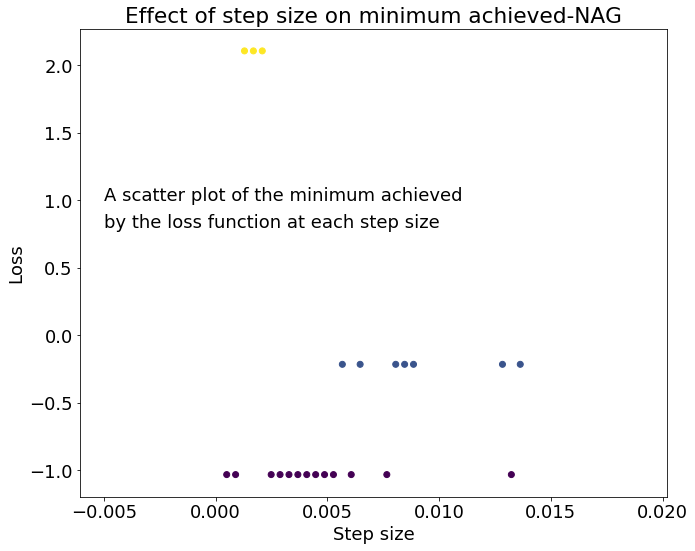

In [37]:
#Effect of step size on point of convergence
font = {'size': 18}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(eta, loss, c=loss)
ax1.set_xlabel('Step size')
ax1.set_ylabel('Loss')
ax1.set_title('Effect of step size on minimum achieved-NAG')
ax1.text(-0.005,1,('A scatter plot of the minimum achieved'))
ax1.text(-0.005,0.8,('by the loss function at each step size'))
ax1.set_xticks(np.arange(-0.005,0.025,0.005))
plt.tight_layout()
fig.savefig('min_loss3.png')

- **The plot below shows the distribution of the minimums achieved**
    - *Ignore the last bar of infinity*

<function matplotlib.pyplot.show(*args, **kw)>

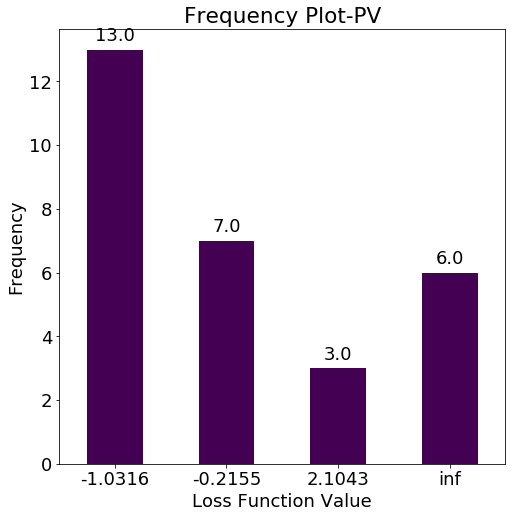

In [38]:
#Distribution of the minimas achieved
df = pd.DataFrame({'freq': loss})
x = df.groupby('freq', as_index=False).size()
font= {'size': 12}
ax = x.plot(figsize=(8,8), kind='bar', title = 'Frequency Plot-PV', cmap='viridis')
ax.set_xlabel("Loss Function Value")
ax.set_ylabel("Frequency")
#Rotate labels on x-axis
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
# For each bar: Place a label
def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        # Number of points between bar and label. Change to your liking.
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.1f}".format(y_value)
        ax.annotate(label,(x_value, y_value), xytext=(0, space),
                    textcoords="offset points",ha='center',va=va)
add_value_labels(ax)
plt.savefig('min_loss_freq3.png')
plt.show

**Key Obsevations**

- The algorithm converged in more cases than momentum gradient descent( 46% of the time compared to 34% under momentum)
- This highlights the ability of Nestrov's Accelerated gradient descent to reduce the size of step in advance as it approaches a minimum hence the higher number of convergences.
- However, it also brings about one weakness: the function converges at a minimum other than the global minimum at more instances 
    -Of the times it converges, Nestrov's Accelerated gradient descent converges at the global minimum 56% of the time compared to 80% under momentum gradient design.

<a id='conclusion'></a>
## 1.9 Conclusion
[Go to top](#top)

- From the above plots, we can note that despite it's inefficincies, plain vanilla will converge in most cases provided that the maximum step size is not breached
- If you compare the point at which it converges, plain vanilla performs worst since it converges at a local minimum 505 of the time.
- Momentum gradient descent improves considerably on plain vanilla gradient descent by:
        - Reducing the number of steps taken to convergence and
        - Increasing the proportion at which it converges to the global minimum(81% of the tme)
    - However, the function converges only 30% of the time which is a weakness brought about by accelerating without considering the future position
- Nestrov's Accelerated gradient descent improves on Momentum gradient descent by:
        - Reducing the number of steps taken to convergence further
        - Increasing the proportion at which it converges to a minimum(56% of the tme compared to 30% under momentum)
    - Despite the increase in number of times the function converges, the number of times it converged at the global mnimum did not change from the number under momentum.
    - The extra times it converged, it converged at another local minimum

<br>